In [152]:
from Utils import train_knn, get_dist_idx, get_recommend_url
import pandas as pd
import time

In [153]:
data = pd.read_csv('/Users/shuchenz/Desktop/Ops Con/ChangingRoom/Coding/Data/sample_data.csv')

In [154]:
metrics = ['cosine', 'euclidean', 'manhattan']
irre_col = ['In Stock', 'URL', 'Image URL', 'item_number', 'brand_code']

iter_time = 30
n = 11
df_out = pd.DataFrame(columns=["Sample Size","Metric", "Training Time","Running Time","Input_Item","Recommended_Item"])
X = pd.DataFrame(data.drop(irre_col, axis=1))
X = pd.get_dummies(X)


from random import randrange
for i in range(iter_time):
    start = time.time()
    input_id = randrange(len(data))
    for m in metrics:
        try:
            trained_knn, runtime = train_knn(n, m, X)
            dist, idx = get_dist_idx(trained_knn, input_id, X)
            try:
                input_url, rec_url = get_recommend_url(dist, idx, input_id, data['Image URL'])
                end = time.time() - start
                out = {"Sample Size": len(data), "Metric":m, "Training Time": runtime, "Running Time": end, "Input_Item": input_url, "Recommended_Item": rec_url}
                df_out = pd.concat([df_out, pd.DataFrame.from_records([out])], axis=0, ignore_index = True)
            except:
                continue
        except:
            continue


In [174]:
# not sure why the system refused me to put this func to Util...
def hit_rate(input, rec, data, col):
    import pandas as pd
    import numpy as np
    input_id = input[0]
    rec = pd.DataFrame(rec, columns=['id', 'url'])
    rec_id = rec['id']
    input_cate = data.iloc[input_id, :][col]
    print(input_cate)
    rec_cate = data.iloc[rec_id, :][col]
    print(list(rec_cate))
    if(type(input_cate) == str):
        result = rec_cate.str.match(pat = input_cate)
    else:
        result = 0
    return np.nansum(result)/len(rec_cate)


def display(url_list):
    from IPython.display import display, Markdown
    import ipyplot
    ipyplot.plot_images(url_list, max_images = 100, img_width=150)
    print()

In [ ]:
hit = []
target_category = ['Category', 'designer','exterior_color']
for i in df_out.index:
    cate_hit = []
    for c in target_category:
        cate_hit.append(hit_rate(df_out['Input_Item'][i], df_out['Recommended_Item'][i], data, c))
    hit.append(cate_hit)

<AxesSubplot:title={'center':'Running Time'}, xlabel='Metric'>

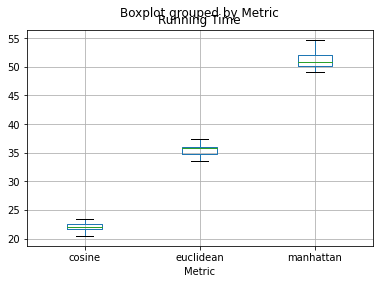

In [176]:
df_out.boxplot("Running Time", by="Metric", showfliers=False)

In [177]:
df_out[target_category] = hit
grouped = df_out.groupby('Metric')
grouped.mean()

,Training Time,Running Time,Category,designer,exterior_color
Metric,,,,,
cosine,2.261304,22.325668,0.603333,0.686667,0.733333
euclidean,2.174640,35.769562,0.273333,0.390000,0.366667
manhattan,2.109386,58.485811,0.316667,0.410000,0.390000


In [178]:
trial = 1
df_out.to_csv("basic_knn_trial" + str(trial) + ".csv")

In [179]:
for i in range(0, 10, 3):
    print("Test Number", i, ": ")
    for k in [i, i+1, i+2]:
        rec = pd.DataFrame(df_out['Recommended_Item'][k], columns = ['Index', 'Rec_URL'])      
        display([df_out["Input_Item"][k][1]]+list(rec['Rec_URL']))

Test Number 0 : 



Test Number 3 : 



Test Number 6 : 



Test Number 9 : 


In [151]:
for i in range(0, len(df_out), 3):
    print("Test Number", i, ": ")
    for k in [i, i+1, i+2]:
        rec = pd.DataFrame(df_out['Recommended_Item'][k], columns = ['Index', 'Rec_URL'])      
        display([df_out["Input_Item"][k][1]]+list(rec['Rec_URL']))


Test Number 0 : 



Test Number 3 : 



Test Number 6 : 



Test Number 9 : 



Test Number 12 : 



Test Number 15 : 



Test Number 18 : 



Test Number 21 : 



Test Number 24 : 



Test Number 27 : 
